In [1]:
## Simulación de 

In [2]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, degrees
from diffractio import degrees, mm, nm, um
from diffractio import np, plt
from matplotlib.patches import Rectangle
import os, time
from glob import glob
import imageio
from PIL import Image
from scipy.signal import find_peaks
from matplotlib import rcParams

In [3]:
rcParams['figure.dpi'] = 150  #dpi
rcParams['axes.linewidth'] = 1.5
rcParams['axes.formatter.useoffset'] = False
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18

In [4]:
def Fringe_Displacement_Simulation(N_phase = 2, N_angles = 9, azimuth_E1 = 90 * degrees, ellipticity_E1 = 0 * degrees, p1_E1 = 1, p2_E1 = 0, azimuth_E2 = 0 * degrees, ellipticity_E2 = 0 * degrees, p1_E2 = 1, p2_E2 = 0, R_ret = 90 * degrees, ellipticity_ret = 0 * degrees, azimuth_P = 45 * degrees, ellipticity_P = 0 * degrees, draw = False, title = None, filename = ""):
    
    # Grabación de directorios
    ruta = os.getcwd()
    try:
        os.stat(ruta+"\Images")
    except:
        os.mkdir(ruta+"\Images")

    # Definición de ángulos y fases: 
    phase = np.linspace(0, N_phase * 360 * degrees, N_phase * 360 +1)
    angles = np.linspace(0, 180 * degrees, N_angles)
    
    if not 90 in angles/degrees: 
        print("Se ha cambiado N_angles = 9, para que pueda realizarse la gráfica correctamente")
        N_angles = 9
        angles = np.linspace(0, 360 * degrees, N_angles)
    
    # Nombre del archivo
    if filename == "": 
            filename = "end"
                    
    Angles, Phase = np.meshgrid(angles, phase)
    legend = np.round(angles / degrees, 0).astype('int')      # leyenda para las gráficas

    # Polarizaciones de los brazos: 
    E0 = Jones_vector().linear_light(azimuth = 45 * degrees, intensity = 1)
    E1 = Jones_matrix().diattenuator_azimuth_ellipticity(p1 = p1_E1, p2 = p2_E1, azimuth = azimuth_E1, ellipticity = ellipticity_E1) * E0/4
    E2 = Jones_matrix().diattenuator_azimuth_ellipticity(p1 = p1_E2, p2 = p2_E2, azimuth = azimuth_E2, ellipticity = ellipticity_E2) * E0.add_global_phase(Phase)/4
    # Interferencia de los haces de intensidad:
    E = E1 + E2
    
    # Paso del haz final por el retardador y el polarizador: 
    Q = Jones_matrix().retarder_azimuth_ellipticity(R = R_ret, azimuth = Angles, ellipticity = ellipticity_ret)
    P = Jones_matrix().diattenuator_azimuth_ellipticity(azimuth = azimuth_P, ellipticity = ellipticity_P)
    Efinal = P * Q * E
    
    # Representación gráfica: 
    if N_angles <= 48:
        I = Efinal.parameters.intensity()
        plt.figure(figsize=(12,6))
        for ind in range(N_angles):
            ls = "-" if ind <= N_angles/2 else "--"
            Inorm = 0.0625
            plt.plot(I[:,ind]/Inorm, linestyle=ls, linewidth=3, label = str(legend[ind])+'°')

        plt.legend( loc=1, fontsize = 14)
        plt.xlim([0,360])
        plt.ylim([0,1])
    else:
        Efinal.parameters.azimuth_ellipticity(draw=True)
        I = Efinal.parameters.intensity(draw=True)
    
    os.chdir(ruta+"\Images")
    if title is not None: 
        plt.title("{}".format(title), fontsize = 25)
    plt.xlabel("$\\Phi'$ (°)", fontsize = 25)
    plt.ylabel("I (arb.u.)", fontsize = 25)
    

    
    
    I0 = np.array(I[:,0])
    If = np.array(I[:,np.where(angles == 90*degrees)[0][0]])
    x_min = find_peaks(-I0)[0][0]
    x_max = find_peaks(-If)[0][0]
    print(x_max-x_min)
    plt.gca().add_patch(Rectangle((x_min,0),x_max-x_min,1, alpha=0.5))
    plt.savefig("Simulation_{}.jpg".format(filename))
    os.chdir(ruta)
    
    if draw == True:
        os.chdir(ruta+"\Images")
        for i in range (len(I[0,:])): 
            im_intensity = np.tile(I[:,i],(200,1))
            plt.figure()
            plt.imshow(im_intensity, cmap='gray')
            plt.axis('off')
            plt.clim(0,I0.max())
            plt.savefig("Simulation_{:03d}.png".format(i), bbox_inches='tight',pad_inches = 0)
            plt.close()      
        os.chdir(ruta) 
        os.chdir(ruta+"\Images")     
        filenames = sorted(list(glob("Simulation_*.png")))
        imgs = []
        for f in filenames:
            imgs.append(imageio.imread(f))
        imageio.mimsave("Simulation_{}.gif".format(filename), imgs, duration=1.5, subrectangles=True)
        # Eliminación archivos temporales
        for j in range(len(filenames)): 
            os.remove(filenames[j])       
        os.chdir(ruta)
        print("Terminado.") 
    return; 

In [5]:
# Figura 4
dicc_prueba = {}
dicc_prueba["N_phase"] = 1
dicc_prueba["N_angles"] = 7
dicc_prueba["azimuth_E1"] = 90 * degrees
dicc_prueba["p1_E1"] = 1
dicc_prueba["p2_E1"] = 0
dicc_prueba["azimuth_E2"] = 0 * degrees
dicc_prueba["p1_E2"] = 1
dicc_prueba["p2_E2"] = 0
dicc_prueba["R_ret"] = 90 * degrees
dicc_prueba["ellipticity_ret"] = 0 * degrees
dicc_prueba["azimuth_P"] = 45 * degrees
dicc_prueba["ellipticity_P"] = 0 * degrees
dicc_prueba["draw"] = True
dicc_prueba["title"] = None
dicc_prueba["filename"] = "end"

180
Terminado.


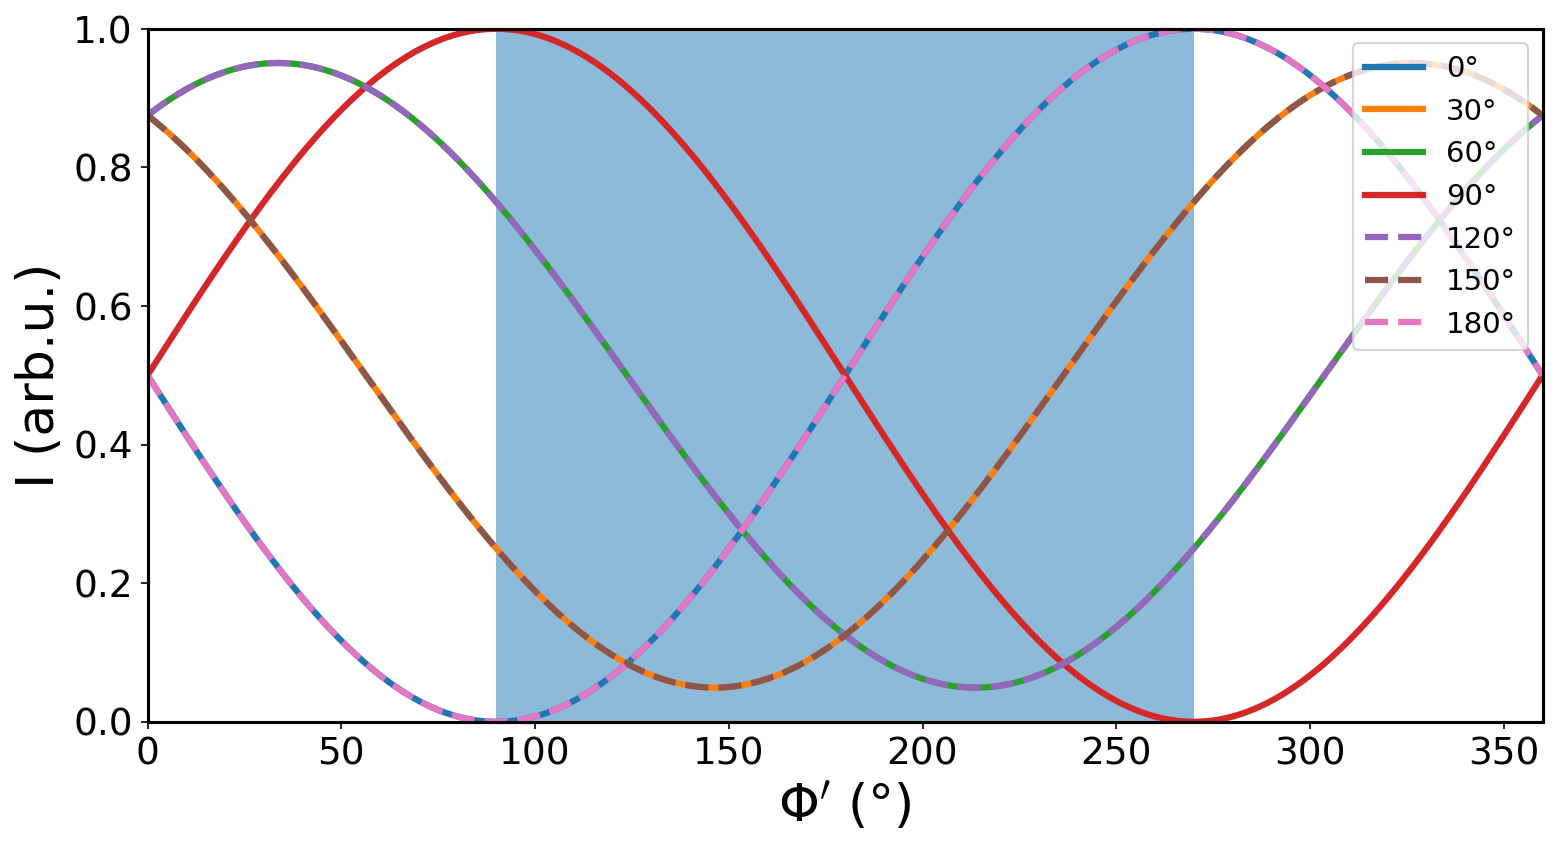

In [6]:
Fringe_Displacement_Simulation(**dicc_prueba)


In [7]:
# Figura 5a
dicc_prueba = {}
dicc_prueba["N_phase"] = 1
dicc_prueba["N_angles"] = 7
dicc_prueba["azimuth_E1"] = 90 * degrees
dicc_prueba["p1_E1"] = 1
dicc_prueba["p2_E1"] = 0
dicc_prueba["azimuth_E2"] = 0 * degrees
dicc_prueba["p1_E2"] = 1
dicc_prueba["p2_E2"] = 0
dicc_prueba["R_ret"] = 90 * degrees
dicc_prueba["ellipticity_ret"] = 0 * degrees
dicc_prueba["azimuth_P"] = 50 * degrees
dicc_prueba["ellipticity_P"] = 0 * degrees
dicc_prueba["draw"] = True
dicc_prueba["title"] = 'a)'
dicc_prueba["filename"] = "end"

180
Terminado.


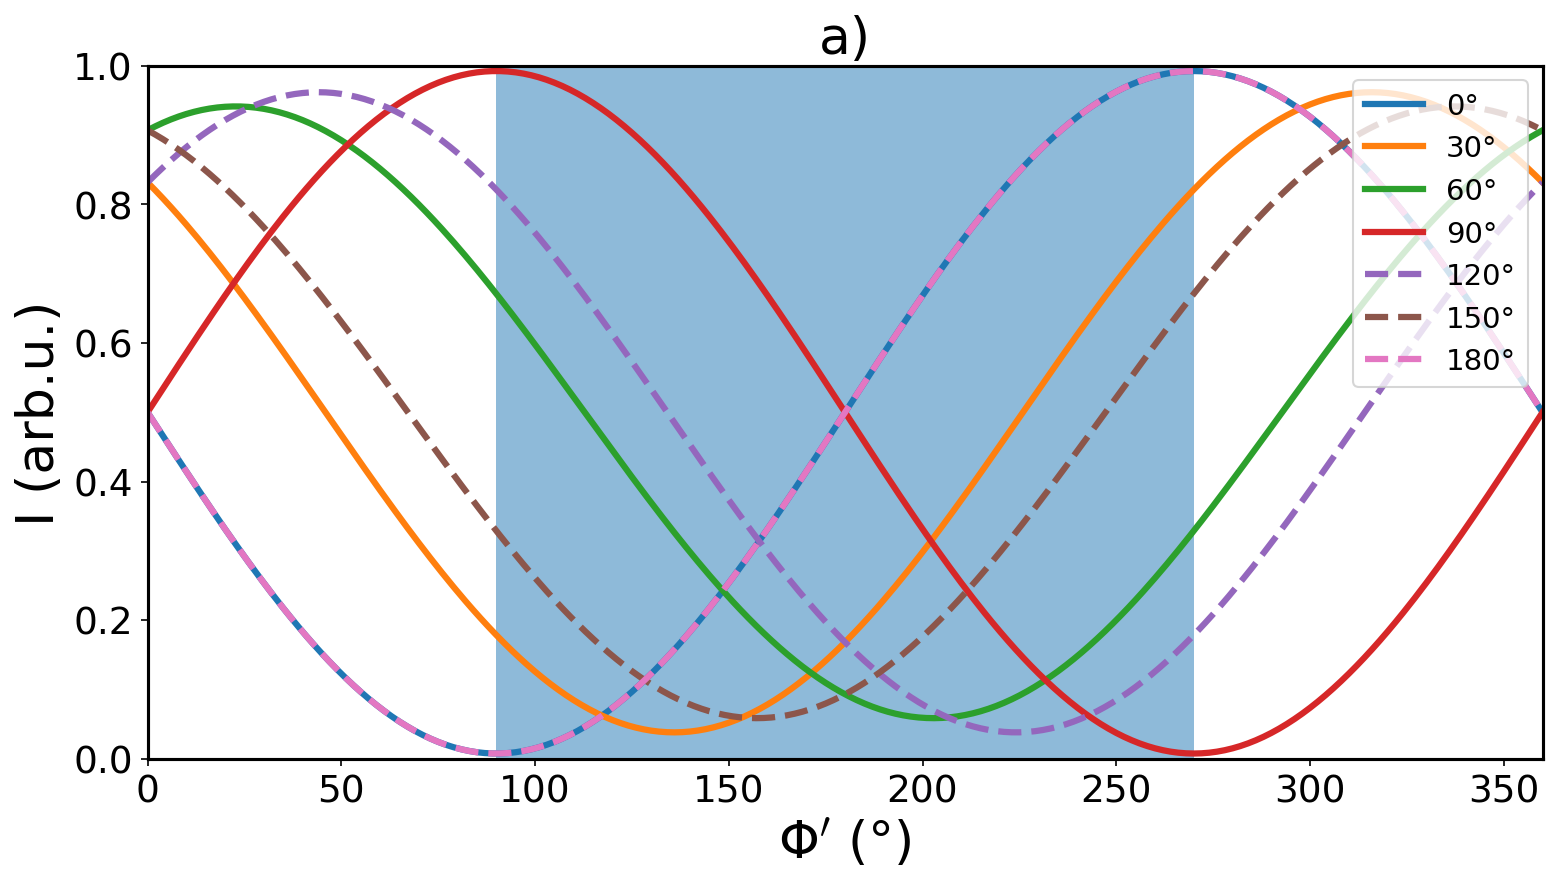

In [8]:
Fringe_Displacement_Simulation(**dicc_prueba)
plt.savefig('Figura 5a.png', dpi = 300)


In [9]:
# Figura 5b
dicc_prueba = {}
dicc_prueba["N_phase"] = 1
dicc_prueba["N_angles"] = 7
dicc_prueba["azimuth_E1"] = 90 * degrees
dicc_prueba["p1_E1"] = 1
dicc_prueba["p2_E1"] = 0
dicc_prueba["azimuth_E2"] = 0 * degrees
dicc_prueba["p1_E2"] = 1
dicc_prueba["p2_E2"] = 0
dicc_prueba["R_ret"] = 90 * degrees
dicc_prueba["ellipticity_ret"] = 20 * degrees
dicc_prueba["azimuth_P"] = 45 * degrees
dicc_prueba["ellipticity_P"] = 0 * degrees
dicc_prueba["draw"] = True
dicc_prueba["title"] = 'b)'
dicc_prueba["filename"] = "end"

180
Terminado.


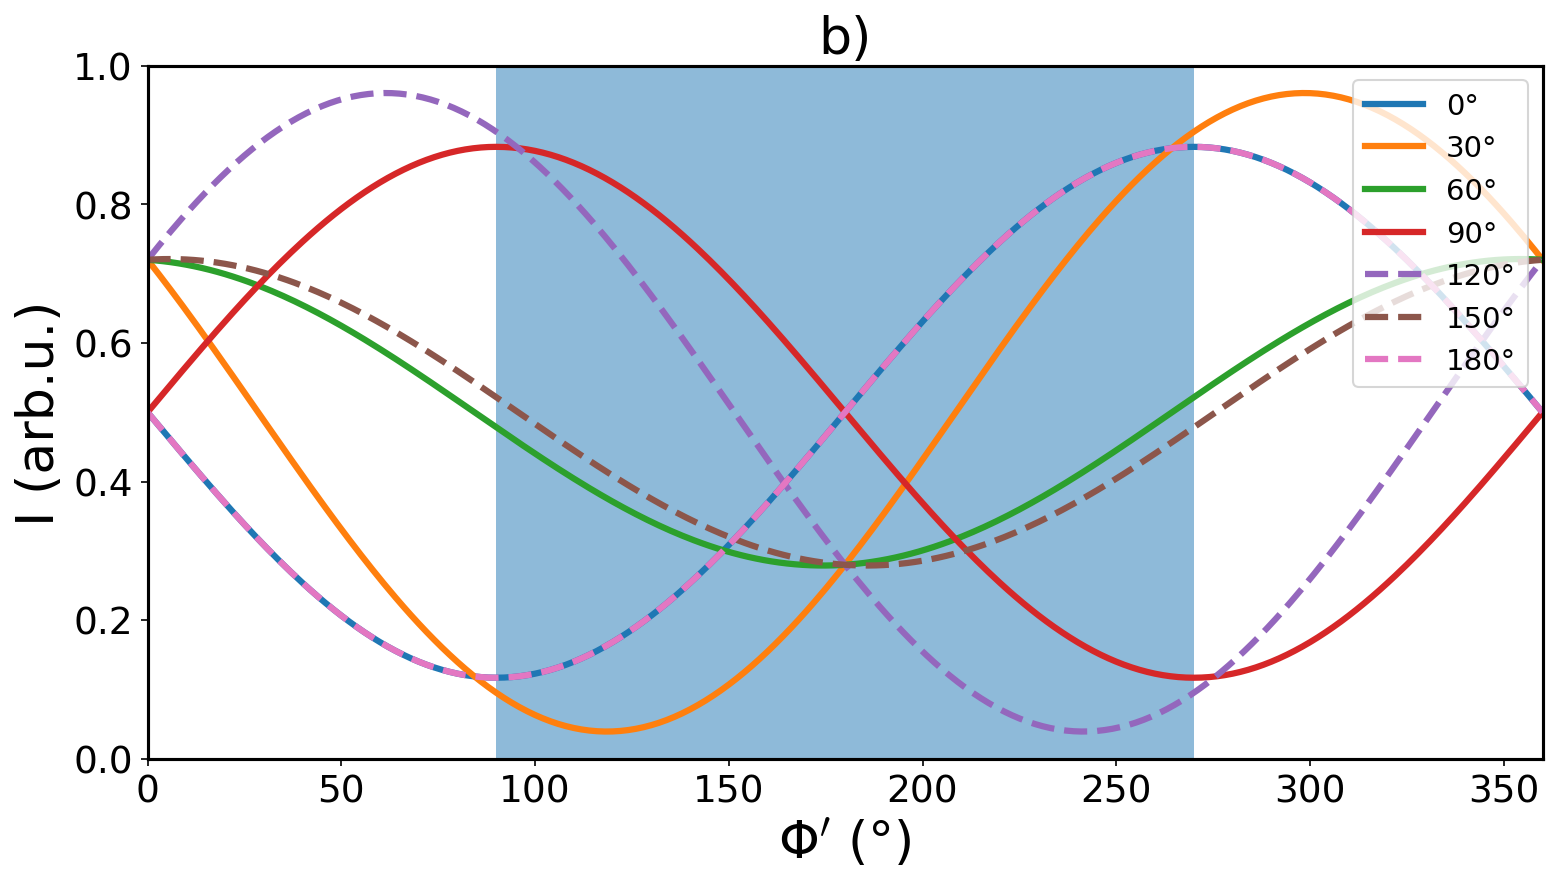

In [10]:
Fringe_Displacement_Simulation(**dicc_prueba)
plt.savefig('Figura 5b.png', dpi = 300)

In [11]:
# Figura 5c
dicc_prueba = {}
dicc_prueba["N_phase"] = 1
dicc_prueba["N_angles"] = 7
dicc_prueba["azimuth_E1"] = 90 * degrees
dicc_prueba["p1_E1"] = 0.8
dicc_prueba["p2_E1"] = 0.1
dicc_prueba["azimuth_E2"] = 0 * degrees
dicc_prueba["p1_E2"] = 0.8
dicc_prueba["p2_E2"] = 0.1
dicc_prueba["R_ret"] = 90 * degrees
dicc_prueba["ellipticity_ret"] = 0 * degrees
dicc_prueba["azimuth_P"] = 45 * degrees
dicc_prueba["ellipticity_P"] = 0 * degrees
dicc_prueba["draw"] = True
dicc_prueba["title"] = 'b)'
dicc_prueba["filename"] = "end"

152
Terminado.


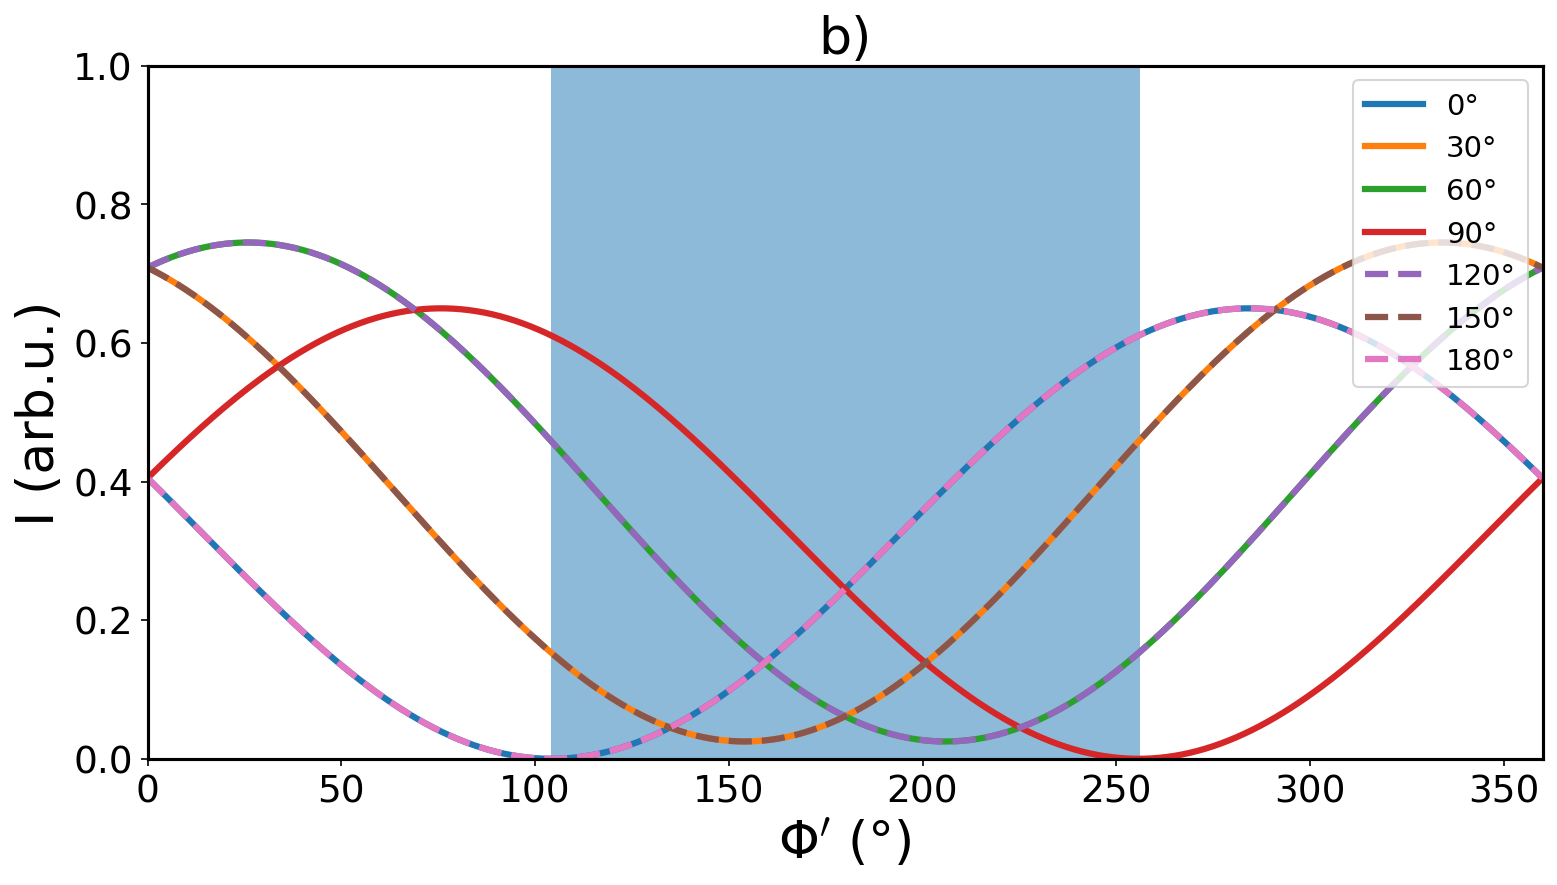

In [12]:
Fringe_Displacement_Simulation(**dicc_prueba)
plt.savefig('Figura 5c.png', dpi = 300)